### REU Lab notes

This are my lab notes for the search experiment.

<a id="table of content"></a>
* #### Table of Content
    * [SymPy](#note 1)
    * [Risk Model](#risk model)
    * [Search Model](#search model)

<a id="note 1"></a>
##### SymPy

* Issues
    * restart the kernal if python stopped working













<a id="risk model"></a>
##### Risk Model


In [118]:
import sympy as sp 
import pylab as pl
import math
e = math.e

def utility_fuction(theta,payoff):
    """return utility for specific theta value and  payoff"""
    t, c = sp.symbols('t c')
    if theta != 1:
        u = (1/(1-t))*(c**(1-t))
        util = u.subs([(t,theta),(c,payoff)])
    else:
        u = math.log(c,e)
        util = u.subs([(c,payoff)])
        #still having problem when theta=1
    return util 




def total_utility_function(probablity1,payoff1,probablity2,payoff2,thetat):
    """return total utility given two payoffs their probablities and theta"""
    p1, ut1, p2, ut2 = sp.symbols('p1 ut1 p2 ut2')
    ut1 = utility_fuction(thetat,payoff1)
    ut2 = utility_fuction(thetat,payoff2)
    uu = (p1 * ut1) + (p2 * ut2)
    expected_total_util = uu.subs([(p1,probablity1),(p2,probablity2)])
    #print(expected_total_util)
    return expected_total_util


def option_choice(payoff1A,payoff2A,payoff1B,payoff2B,thetatt):
    """return option choices"""
    option_choices = []
    for i in range (1,11):
        if total_utility_function((i/10),payoff1A,(1-(i/10)),payoff2A,
                thetatt) > total_utility_function((i/10),payoff1B,(1-(i/10)),payoff2B,thetatt):
            option_choices.append('A')
        else:
            option_choices.append('B')
    return option_choices

print(math.log(math.e))


for i in range (1,9): #generate Key for agents with differemt theta
    print('theta =', 0.1*i)
    print(option_choice(2,1.6,3.85,0.1,0.1*i))
    print("\n")
    



1.0
theta = 0.1
['A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'B']


theta = 0.2
['A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B']


theta = 0.30000000000000004
['A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B']


theta = 0.4
['A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B']


theta = 0.5
['A', 'A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B']


theta = 0.6000000000000001
['A', 'A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B']


theta = 0.7000000000000001
['A', 'A', 'A', 'A', 'A', 'A', 'A', 'B', 'B', 'B']


theta = 0.8
['A', 'A', 'A', 'A', 'A', 'A', 'A', 'B', 'B', 'B']




<a id="search model"></a>
##### Search Model


In [75]:
import sympy as sp 
import pylab as pl
import math

def reserve_price(probablity,reward,cost):
    """given probablity of sucxcess, reward of success and the 
            cost of opening the box, return reservation price"""
    reservation_price = (probablity * reward - cost) / probablity 
    return reservation_price

def reserve_price_crra(probablity,reward,cost,theta):
    """given probablity of sucxcess, reward of success, the 
            cost of opening the box, and theta value, return reservation price incorporating CRRA"""
    reservation_price_crra = ((reward**(1-theta))-((cost**(1-theta))/ probablity))**(1 / (1-theta))
    return reservation_price_crra




In [74]:
#############################
# creating class called box
#############################
class box:
    def __init__(self,probablity,reward,cost):
        pass








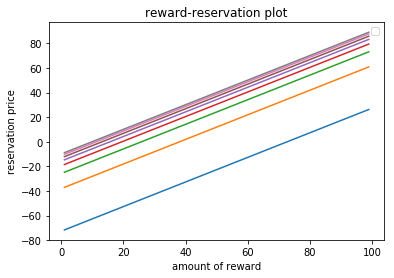

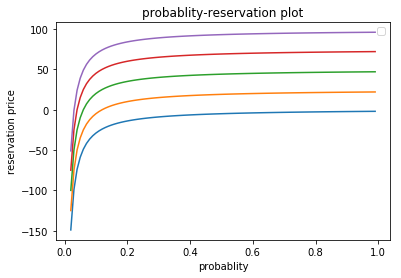

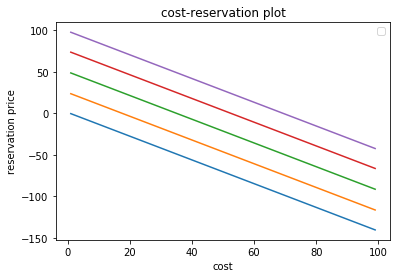

In [78]:
######################################################
# plot for the reward against reservation price
######################################################
probablities = []
n = 0.01
for i in range (1,9):
    n += 0.1
    probablities.append(n)

for p in (probablities):
    rp_x_coords = []
    rp_y_coords = []
    for i in range (1,100):
        rp_x_coords.append(i)
        rp_y_coords.append(reserve_price(p,i,8)) 
    pl.plot(rp_x_coords,rp_y_coords)
    pl.title('reward-reservation plot')
    pl.xlabel('amount of reward')
    pl.ylabel('reservation price')
    pl.legend('')
pl.show()
######################################################

######################################################
# plot for the probablity against reservation price
######################################################
probablities = []
n = 0.01
for i in range (1,99):
    n += 0.01
    probablities.append(n)

for i in (1,25,50,75,99):
    rp_x_coords = []
    rp_y_coords = []
    for p in probablities:
        rp_x_coords.append(p)
        rp_y_coords.append(reserve_price(p,i,3)) 
    pl.plot(rp_x_coords,rp_y_coords)
    pl.title('probablity-reservation plot')
    pl.xlabel('probablity')
    pl.ylabel('reservation price')
    pl.legend('')
pl.show()
######################################################
    
######################################################
# plot for the cost against reservation price
######################################################
probablities = []
n = 0.01
for i in range (1,99):
    n += 0.01
    probablities.append(n)

for i in (1,25,50,75,99):
    rp_x_coords = []
    rp_y_coords = []
    for c in range (1,100):
        rp_x_coords.append(c)
        rp_y_coords.append(reserve_price(0.7,i,c)) 
    pl.plot(rp_x_coords,rp_y_coords)
    pl.title('cost-reservation plot')
    pl.xlabel('cost')
    pl.ylabel('reservation price')
    pl.legend('')
pl.show()
######################################################



In [81]:
############################################################
#incorporating CRRA into the search model and solve for z
############################################################
import sympy as sp 
import pylab as pl
import math

t, c, z, p, x = sp.symbols('t c z p x')
sp.pprint((sp.solve((((1/(1-t))*
                      (z**(1-t)))-(((p((1/(1-t))*
                        (x**(1-t))))-((1/(1-t))*(c**(1-t))))/p)),z)))
############################################################

⎡                                            -1  ⎤
⎢                                           ─────⎥
⎢                                           t - 1⎥
⎢⎛               ⎛  -t + 1 ⎞    ⎛  -t + 1 ⎞⎞     ⎥
⎢⎜   -t + 1      ⎜-x       ⎟    ⎜-x       ⎟⎟     ⎥
⎢⎜- c       - t⋅p⎜─────────⎟ + p⎜─────────⎟⎟     ⎥
⎢⎜               ⎝  t - 1  ⎠    ⎝  t - 1  ⎠⎟     ⎥
⎢⎜─────────────────────────────────────────⎟     ⎥
⎣⎝                    p                    ⎠     ⎦
